# Coffea-Casa Benchmark Example 1

In [1]:
%matplotlib inline

import numpy as np
import coffea.processor as processor
import awkward as ak
import hist
from coffea.nanoevents import schemas
from coffea.nanoevents.schemas import BaseSchema, NanoAODSchema

In [2]:
class Q1Processor(processor.ProcessorABC):
    def process(self, events):
        return (
            hist.Hist.new.Reg(100, 0, 200, name="met", label="$E_{T}^{miss}$ [GeV]")
            .Double()
            .fill(events.met_pt)
        )

    def postprocess(self, accumulator):
        return accumulator


In [3]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:41775")
client

<Client: 'tcp://127.0.0.1:41775' processes=1 threads=4, memory=15.70 GiB>

In [4]:
run = processor.Runner(
    executor=processor.DaskExecutor(client=client),
    use_skyhook=True,
    format="parquet",
    schema=BaseSchema,
    )

out = run(
    {'SingleMu' : "/mnt/cephfs/AGC/modified_agc.parquet"},
    "events",
    processor_instance=Q1Processor()
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbd24c4d5e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

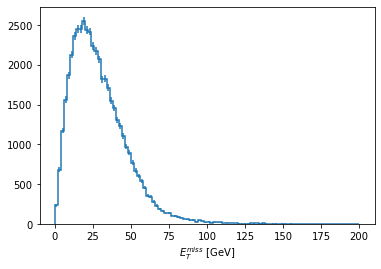

In [ ]:
out.plot1d()